In [2]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors



In [3]:

# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [24]:

file_url = r'C:\Users\Lenovo\Documents\INDE DATA\MERGEQUANTITYFOODHOUSEHOLDNSS68.csv'
merge= pd.read_csv(file_url)
#We make a copy of the file and work on it
merge= merge.copy()
merge.head(2)

,HHID,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
0,715581201,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,119468,46500.0,2500.0,1000.0,NaN,1500.0,3000.0,1000.0,8.0,2300.0,NaN,200.0,NaN,1000.0,5500.0,1100.0,NaN
1,715581202,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,223878,20800.0,1000.0,2000.0,2000.0,2300.0,NaN,900.0,NaN,1500.0,NaN,300.0,NaN,1000.0,4000.0,775.0,NaN


In [25]:
merge.shape

(99307, 26)

# A. Encoding 

In [26]:
merge.dtypes


HHID                                      int64
Sector                                   object
HH_Size                                   int64
Religion                                 object
Social_Group                             object
whether_Land_owned                       object
State_code                               object
Regular_salary_earner                    object
Possess_ration_card                      object
MPCE_MRP                                  int64
Cereal                                  float64
Pulses and Pulse Products               float64
beef / buffalo meat(Kg)                 float64
beer (l.)                               float64
chicken(Kg)                             float64
country liquor (l.)                     float64
edible oil                              float64
eggs(no)                                float64
fish, prawn(Kg)                         float64
foreign/ refined liquor or wine (l.)    float64
fruits (dry)                            

In [27]:
merge=merge.drop(['HHID'], axis=1)


In [28]:
merge

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
0,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,119468,46500.0,2500.0,1000.0,NaN,1500.0,3000.0,1000.0,8.0,2300.0,NaN,200.0,NaN,1000.0,5500.0,1100.0,NaN
1,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,223878,20800.0,1000.0,2000.0,2000.0,2300.0,NaN,900.0,NaN,1500.0,NaN,300.0,NaN,1000.0,4000.0,775.0,NaN
2,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,198586,22800.0,1000.0,NaN,NaN,1000.0,3000.0,1200.0,20.0,2000.0,NaN,NaN,NaN,1000.0,4000.0,750.0,NaN
3,rural,1,Islam,Scheduled Tribes,Yes,MEGHALAYA,no,yes,355752,10400.0,750.0,1000.0,NaN,1300.0,3000.0,450.0,NaN,1500.0,NaN,NaN,NaN,1000.0,2000.0,710.0,NaN
4,rural,6,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,79006,61300.0,2000.0,NaN,NaN,1000.0,3000.0,2050.0,24.0,4000.0,NaN,NaN,NaN,1000.0,5000.0,1400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,yes,yes,366464,29000.0,2400.0,NaN,NaN,1000.0,NaN,3250.0,25.0,1500.0,NaN,NaN,500.0,NaN,3100.0,2375.0,NaN
99303,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,no,no,452463,23000.0,2750.0,NaN,NaN,2000.0,NaN,3000.0,22.0,2000.0,NaN,NaN,NaN,NaN,3500.0,1225.0,NaN
99304,urban,6,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,171808,41000.0,5000.0,NaN,NaN,2500.0,NaN,4250.0,35.0,2000.0,NaN,NaN,NaN,NaN,3500.0,2800.0,NaN
99305,urban,3,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,223069,34000.0,3000.0,NaN,NaN,1000.0,NaN,3500.0,24.0,2000.0,NaN,NaN,250.0,NaN,3000.0,2450.0,NaN


In [29]:
merge.shape

(99307, 25)

In [30]:
merge_encode=merge


In [31]:
merge_encode.shape

(99307, 25)

In [32]:
merge_encode.columns

Index(['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'Regular_salary_earner', 'Possess_ration_card',
       'MPCE_MRP', 'Cereal', 'Pulses and Pulse Products',
       'beef / buffalo meat(Kg)', 'beer (l.)', 'chicken(Kg)',
       'country liquor (l.)', 'edible oil', 'eggs(no)', 'fish, prawn(Kg)',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)',
       'goat meat /mutton(Kg)', 'pork(Kg)', 'salt & sugar', 'spices',
       'toddy (l.)'],
      dtype='object')

## 1. Encoding non-numeric data

In [33]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
for col in ['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'Regular_salary_earner', 'Possess_ration_card',
       'MPCE_MRP' ]:
    merge_encode[col] = lbl_encoder.fit_transform(merge_encode[col])
merge_encode

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
0,0,4,1,3,1,22,0,1,26484,46500.0,2500.0,1000.0,NaN,1500.0,3000.0,1000.0,8.0,2300.0,NaN,200.0,NaN,1000.0,5500.0,1100.0,NaN
1,0,1,1,3,1,22,0,1,58621,20800.0,1000.0,2000.0,2000.0,2300.0,NaN,900.0,NaN,1500.0,NaN,300.0,NaN,1000.0,4000.0,775.0,NaN
2,0,1,1,3,1,22,0,1,53286,22800.0,1000.0,NaN,NaN,1000.0,3000.0,1200.0,20.0,2000.0,NaN,NaN,NaN,1000.0,4000.0,750.0,NaN
3,0,0,3,3,1,22,0,1,74142,10400.0,750.0,1000.0,NaN,1300.0,3000.0,450.0,NaN,1500.0,NaN,NaN,NaN,1000.0,2000.0,710.0,NaN
4,0,5,1,3,1,22,0,1,8685,61300.0,2000.0,NaN,NaN,1000.0,3000.0,2050.0,24.0,4000.0,NaN,NaN,NaN,1000.0,5000.0,1400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302,1,2,3,0,0,26,1,1,74885,29000.0,2400.0,NaN,NaN,1000.0,NaN,3250.0,25.0,1500.0,NaN,NaN,500.0,NaN,3100.0,2375.0,NaN
99303,1,2,3,0,0,26,0,0,78859,23000.0,2750.0,NaN,NaN,2000.0,NaN,3000.0,22.0,2000.0,NaN,NaN,NaN,NaN,3500.0,1225.0,NaN
99304,1,5,3,0,1,26,1,1,45988,41000.0,5000.0,NaN,NaN,2500.0,NaN,4250.0,35.0,2000.0,NaN,NaN,NaN,NaN,3500.0,2800.0,NaN
99305,1,2,3,0,1,26,1,1,58469,34000.0,3000.0,NaN,NaN,1000.0,NaN,3500.0,24.0,2000.0,NaN,NaN,250.0,NaN,3000.0,2450.0,NaN


In [34]:
merge_encode.count()

Sector                                  99307
HH_Size                                 99307
Religion                                99307
Social_Group                            99307
whether_Land_owned                      99307
State_code                              99307
Regular_salary_earner                   99307
Possess_ration_card                     99307
MPCE_MRP                                99307
Cereal                                  98933
Pulses and Pulse Products               97603
beef / buffalo meat(Kg)                  9623
beer (l.)                                2136
chicken(Kg)                             40558
country liquor (l.)                      8064
edible oil                              98319
eggs(no)                                43800
fish, prawn(Kg)                         37194
foreign/ refined liquor or wine (l.)     5707
fruits (dry)                            38659
goat meat /mutton(Kg)                   16327
pork(Kg)                          

## 2. Clean/Encoding numeric data: remplacer NAN PAR ZERO 

In [65]:
merge_encode_zero=merge_encode.replace(np.nan,0)
merge_encode_zero

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
0,0,4,1,3,1,22,0,1,26484,46500.0,2500.0,1000.0,0.0,1500.0,3000.0,1000.0,8.0,2300.0,0.0,200.0,0.0,1000.0,5500.0,1100.0,0.0
1,0,1,1,3,1,22,0,1,58621,20800.0,1000.0,2000.0,2000.0,2300.0,0.0,900.0,0.0,1500.0,0.0,300.0,0.0,1000.0,4000.0,775.0,0.0
2,0,1,1,3,1,22,0,1,53286,22800.0,1000.0,0.0,0.0,1000.0,3000.0,1200.0,20.0,2000.0,0.0,0.0,0.0,1000.0,4000.0,750.0,0.0
3,0,0,3,3,1,22,0,1,74142,10400.0,750.0,1000.0,0.0,1300.0,3000.0,450.0,0.0,1500.0,0.0,0.0,0.0,1000.0,2000.0,710.0,0.0
4,0,5,1,3,1,22,0,1,8685,61300.0,2000.0,0.0,0.0,1000.0,3000.0,2050.0,24.0,4000.0,0.0,0.0,0.0,1000.0,5000.0,1400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302,1,2,3,0,0,26,1,1,74885,29000.0,2400.0,0.0,0.0,1000.0,0.0,3250.0,25.0,1500.0,0.0,0.0,500.0,0.0,3100.0,2375.0,0.0
99303,1,2,3,0,0,26,0,0,78859,23000.0,2750.0,0.0,0.0,2000.0,0.0,3000.0,22.0,2000.0,0.0,0.0,0.0,0.0,3500.0,1225.0,0.0
99304,1,5,3,0,1,26,1,1,45988,41000.0,5000.0,0.0,0.0,2500.0,0.0,4250.0,35.0,2000.0,0.0,0.0,0.0,0.0,3500.0,2800.0,0.0
99305,1,2,3,0,1,26,1,1,58469,34000.0,3000.0,0.0,0.0,1000.0,0.0,3500.0,24.0,2000.0,0.0,0.0,250.0,0.0,3000.0,2450.0,0.0


## Clustering with PCA and Kmeans 

In [47]:
W=merge_encode_zero[['Cereal', 'Pulses and Pulse Products',
       'beef / buffalo meat(Kg)', 'beer (l.)', 'chicken(Kg)',
       'country liquor (l.)', 'edible oil', 'eggs(no)', 'fish, prawn(Kg)',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)',
       'goat meat /mutton(Kg)', 'pork(Kg)', 'salt & sugar', 'spices',
       'toddy (l.)']]
W=W.sample(frac=.2, axis=0, random_state=0)
W.head()


,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
74217,42000.0,4000.0,0.0,0.0,0.0,0.0,2000.0,0.0,9000.0,0.0,0.0,0.0,0.0,5000.0,1900.0,0.0
3593,56000.0,9000.0,0.0,0.0,2000.0,0.0,3000.0,0.0,2000.0,0.0,2000.0,0.0,3000.0,6000.0,450.0,0.0
11005,40000.0,1500.0,0.0,0.0,0.0,0.0,1000.0,0.0,2500.0,0.0,0.0,0.0,0.0,1000.0,525.0,0.0
41134,44000.0,3000.0,0.0,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,500.0,0.0,0.0,6000.0,550.0,0.0
81496,59000.0,2000.0,0.0,0.0,0.0,0.0,4200.0,0.0,0.0,0.0,2100.0,0.0,0.0,7000.0,1225.0,0.0


,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
74217,42000.0,4000.0,0.0,0.0,0.0,0.0,2000.0,0.0,9000.0,0.0,0.0,0.0,0.0,5000.0,1900.0,0.0
3593,56000.0,9000.0,0.0,0.0,2000.0,0.0,3000.0,0.0,2000.0,0.0,2000.0,0.0,3000.0,6000.0,450.0,0.0
11005,40000.0,1500.0,0.0,0.0,0.0,0.0,1000.0,0.0,2500.0,0.0,0.0,0.0,0.0,1000.0,525.0,0.0
41134,44000.0,3000.0,0.0,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,500.0,0.0,0.0,6000.0,550.0,0.0
81496,59000.0,2000.0,0.0,0.0,0.0,0.0,4200.0,0.0,0.0,0.0,2100.0,0.0,0.0,7000.0,1225.0,0.0


In [39]:

from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(W)
df_pca = pca.transform(W)
df_pca.shape

(19861, 1)

In [40]:
df_pca

array([[ -8187.91497219],
       [  6037.92854672],
       [-10582.78765994],
       ...,
       [ 24091.38476682],
       [ 76769.57306076],
       [-10453.84591048]])

In [41]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,2)]) #on choisit 2 PCA
df_pca

,PC1
0,-8187.914972
1,6037.928547
2,-10582.787660
3,-6198.580185
4,8817.225455
...,...
19856,-9286.303160
19857,-19900.020791
19858,24091.384767
19859,76769.573061


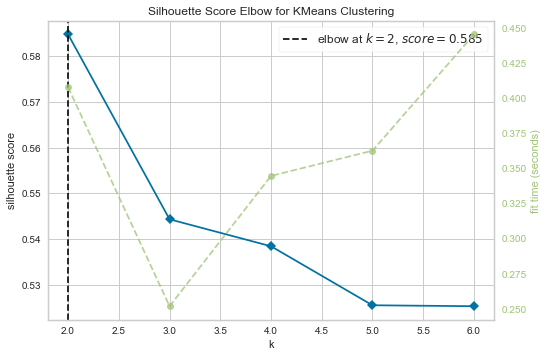

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

# 3. Normalize dataset and clustering full dataset


In [66]:
merge_encode_zero.head()


,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
0,0,4,1,3,1,22,0,1,26484,46500.0,2500.0,1000.0,0.0,1500.0,3000.0,1000.0,8.0,2300.0,0.0,200.0,0.0,1000.0,5500.0,1100.0,0.0
1,0,1,1,3,1,22,0,1,58621,20800.0,1000.0,2000.0,2000.0,2300.0,0.0,900.0,0.0,1500.0,0.0,300.0,0.0,1000.0,4000.0,775.0,0.0
2,0,1,1,3,1,22,0,1,53286,22800.0,1000.0,0.0,0.0,1000.0,3000.0,1200.0,20.0,2000.0,0.0,0.0,0.0,1000.0,4000.0,750.0,0.0
3,0,0,3,3,1,22,0,1,74142,10400.0,750.0,1000.0,0.0,1300.0,3000.0,450.0,0.0,1500.0,0.0,0.0,0.0,1000.0,2000.0,710.0,0.0
4,0,5,1,3,1,22,0,1,8685,61300.0,2000.0,0.0,0.0,1000.0,3000.0,2050.0,24.0,4000.0,0.0,0.0,0.0,1000.0,5000.0,1400.0,0.0


In [68]:
Z=merge_encode_zero
Z



,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
0,0,4,1,3,1,22,0,1,26484,46500.0,2500.0,1000.0,0.0,1500.0,3000.0,1000.0,8.0,2300.0,0.0,200.0,0.0,1000.0,5500.0,1100.0,0.0
1,0,1,1,3,1,22,0,1,58621,20800.0,1000.0,2000.0,2000.0,2300.0,0.0,900.0,0.0,1500.0,0.0,300.0,0.0,1000.0,4000.0,775.0,0.0
2,0,1,1,3,1,22,0,1,53286,22800.0,1000.0,0.0,0.0,1000.0,3000.0,1200.0,20.0,2000.0,0.0,0.0,0.0,1000.0,4000.0,750.0,0.0
3,0,0,3,3,1,22,0,1,74142,10400.0,750.0,1000.0,0.0,1300.0,3000.0,450.0,0.0,1500.0,0.0,0.0,0.0,1000.0,2000.0,710.0,0.0
4,0,5,1,3,1,22,0,1,8685,61300.0,2000.0,0.0,0.0,1000.0,3000.0,2050.0,24.0,4000.0,0.0,0.0,0.0,1000.0,5000.0,1400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302,1,2,3,0,0,26,1,1,74885,29000.0,2400.0,0.0,0.0,1000.0,0.0,3250.0,25.0,1500.0,0.0,0.0,500.0,0.0,3100.0,2375.0,0.0
99303,1,2,3,0,0,26,0,0,78859,23000.0,2750.0,0.0,0.0,2000.0,0.0,3000.0,22.0,2000.0,0.0,0.0,0.0,0.0,3500.0,1225.0,0.0
99304,1,5,3,0,1,26,1,1,45988,41000.0,5000.0,0.0,0.0,2500.0,0.0,4250.0,35.0,2000.0,0.0,0.0,0.0,0.0,3500.0,2800.0,0.0
99305,1,2,3,0,1,26,1,1,58469,34000.0,3000.0,0.0,0.0,1000.0,0.0,3500.0,24.0,2000.0,0.0,0.0,250.0,0.0,3000.0,2450.0,0.0



#### NORMALIZE
import sklearn
from sklearn.preprocessing import normalize
data = normalize(Z)
data = pd.DataFrame(data, columns=Z.columns)
data.head()

In [69]:
Z=Z.sample(frac=.2, axis=0, random_state=0)
Z.head()

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
74217,1,4,2,0,1,17,0,1,26730,42000.0,4000.0,0.0,0.0,0.0,0.0,2000.0,0.0,9000.0,0.0,0.0,0.0,0.0,5000.0,1900.0,0.0
3593,0,6,1,3,1,2,0,1,58204,56000.0,9000.0,0.0,0.0,2000.0,0.0,3000.0,0.0,2000.0,0.0,2000.0,0.0,3000.0,6000.0,450.0,0.0
11005,1,2,2,2,1,21,0,0,34804,40000.0,1500.0,0.0,0.0,0.0,0.0,1000.0,0.0,2500.0,0.0,0.0,0.0,0.0,1000.0,525.0,0.0
41134,0,3,2,1,1,12,0,0,53590,44000.0,3000.0,0.0,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,500.0,0.0,0.0,6000.0,550.0,0.0
81496,0,4,2,1,1,28,0,1,33566,59000.0,2000.0,0.0,0.0,0.0,0.0,4200.0,0.0,0.0,0.0,2100.0,0.0,0.0,7000.0,1225.0,0.0


In [70]:

from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(Z)
df_pca = pca.transform(Z)
df_pca.shape

(19861, 2)

In [71]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,3)]) #on choisit 2 PCA
df_pca

,PC1,PC2
0,473.794754,-16099.725715
1,-4187.662577,18117.329329
2,-5731.409242,-10866.360149
3,-12054.127633,7557.599371
4,11298.017406,-1415.097990
...,...,...
19856,-11457.945392,781.574191
19857,-7117.068936,-26103.538958
19858,20662.696111,12387.597718
19859,77616.141556,20644.939549


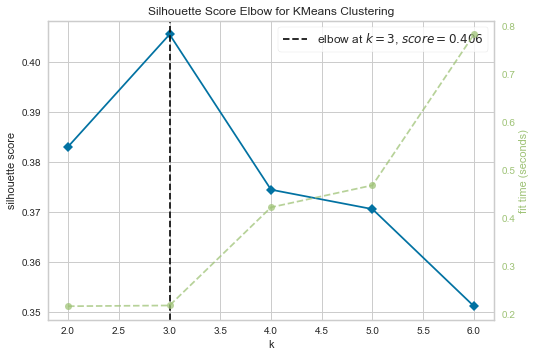

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

# 4.CLUSTERING WITH KMEANS

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(3) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)

k_centers = model.cluster_centers_

merge_encode_one['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)
merge['cluster'] = model.labels_



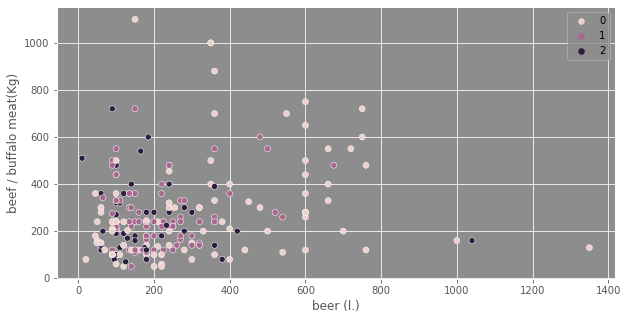

In [43]:

fig, ax = plt.subplots()
sns.scatterplot(data=merge, x='beer (l.)', y='beef / buffalo meat(Kg)', hue=y_pred, cmap='viridis', ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()



<AxesSubplot:xlabel='cluster', ylabel='Religion'>

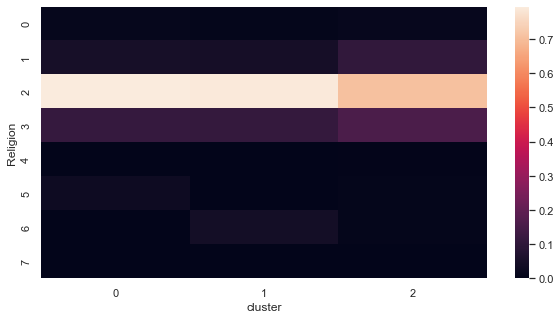

In [44]:

import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(merge.Religion, merge.cluster, normalize='columns'))


In [45]:
merge.groupby(['cluster']) 

In [46]:
merge.groupby(['cluster'])['Social_Group'].value_counts()

cluster  Social_Group
0        0                8670
         1                6740
         3                3033
         2                2837
1        0               15644
         1               11788
         2                8031
         3                3721
2        0               15518
         1               13801
         3                6815
         2                4807
Name: Social_Group, dtype: int64

In [47]:
merge.groupby(['cluster', 'Religion', 'Social_Group' ]).size().sort_values(ascending=False)

cluster  Religion  Social_Group
1        2         0               12818
2        2         0               12128
                   1                9744
1        2         1                8638
0        2         0                7776
                                   ...  
1        7         2                   1
         5         0                   1
0        6         3                   1
         4         3                   1
         0         0                   1
Length: 83, dtype: int64

In [48]:
merge.cluster.value_counts()

2    40941
1    39184
0    21280
Name: cluster, dtype: int64

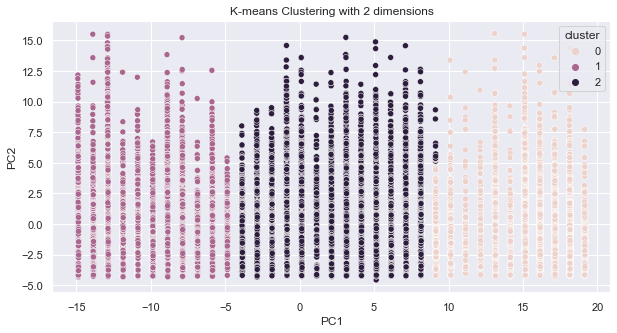

In [50]:
sns.scatterplot(x="PC1", y="PC2", hue=merge['cluster'], data=df_pca )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# #KMEANS WITHOUT PCA AND WITH SPECIFIC COLUMNS

In [66]:
merge_encode_one.sum()
    

Sector                                    41822
HH_Size                                  463578
Religion                                 218213
Social_Group                             104386
whether_Land_owned                        87689
State_code                              1941683
HH_Type_code                             565519
Cereal                                    39694
Milk & Milk Products                      88155
Pulses and Pulse Products                 98393
beef / buffalo meat(Kg)                    9677
beer (l.)                                  2173
chicken(Kg)                               40932
coffee, tea, juice                        98569
country liquor (l.)                        8042
edible oil                                99118
eggs(no)                                  44227
fish, prawn(Kg)                           37549
food non-veg                              68475
foreign/ refined liquor or wine (l.)       5818
fruits (dry)                            

In [107]:
merge_encode_one.columns
    

Index(['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'HH_Type_code', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'coffee, tea, juice', 'country liquor (l.)',
       'edible oil', 'eggs(no)', 'fish, prawn(Kg)', 'food non-veg',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)', 'fruits(fresh)',
       'goat meat /mutton(Kg)', 'packaged processed food', 'pan', 'pork(Kg)',
       'salt & sugar', 'spices', 'tobacco', 'toddy (l.)', 'vegetables',
       'cluster'],
      dtype='object')

In [77]:
X=merge_encode_one[['Religion', 'Social_Group', 'State_code',
        'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'country liquor (l.)',
        'eggs(no)', 'fish, prawn(Kg)', 
       'foreign/ refined liquor or wine (l.)',
       'goat meat /mutton(Kg)',  'pork(Kg)', 'toddy (l.)']]
X2=merge_encode_one[['Religion', 'Social_Group', 'State_code', 'Milk & Milk Products']]

In [79]:
X

,Religion,Social_Group,State_code,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),goat meat /mutton(Kg),pork(Kg),toddy (l.)
0,1,3,22,1,0,1,1,1,1,0,0,1,0
1,1,3,22,1,1,1,0,0,1,0,0,1,0
2,1,3,22,0,0,1,1,1,1,0,0,1,0
3,3,3,22,1,0,1,1,0,1,0,0,1,0
4,1,3,22,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101400,3,0,26,0,0,1,0,1,1,0,1,0,0
101401,3,0,26,0,0,1,0,1,1,0,0,0,0
101402,3,0,26,0,0,1,0,1,1,0,0,0,0
101403,3,0,26,0,0,1,0,1,1,0,1,0,0


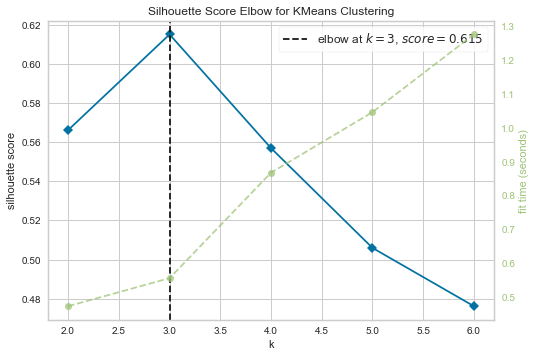

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [80]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(X)
visualizer.poof()

In [630]:
kms = KMeans(n_clusters=3, random_state=1).fit(X)
X['Cluster'] = kms.labels_
X['Cluster Centroid D1'] = X['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
X['Cluster Centroid D2'] = X['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
X

#kms = KMeans(3) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
#kms.fit(merge_encode_one) #ON fIT 
#y_pred = kms.predict(merge_encode_one)

#k_centers = kms.cluster_centers_

#merge_encode_one['cluster'] = kms.labels_  #c'est y-pred ( la longue colonne)
#merge['cluster'] = kms.labels_

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,HH_Type_code,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),"coffee, tea, juice",country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",food non-veg,foreign/ refined liquor or wine (l.),fruits (dry),fruits(fresh),goat meat /mutton(Kg),packaged processed food,pan,pork(Kg),salt & sugar,spices,tobacco,toddy (l.),vegetables,cluster,Cluster,Cluster Centroid D1,Cluster Centroid D2
0,0,5,1,3,1,22,4,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
1,0,2,1,3,1,22,4,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
2,0,2,1,3,1,22,4,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
3,0,1,3,3,1,22,4,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,2,3.024001,0.009541
4,0,6,1,3,1,22,3,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101400,1,3,3,0,0,26,6,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,1,2,3.024001,0.009541
101401,1,3,3,0,0,26,7,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,2,3.024001,0.009541
101402,1,6,3,0,1,26,6,0,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,2,3.024001,0.009541
101403,1,3,3,0,1,26,7,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,1,2,3.024001,0.009541


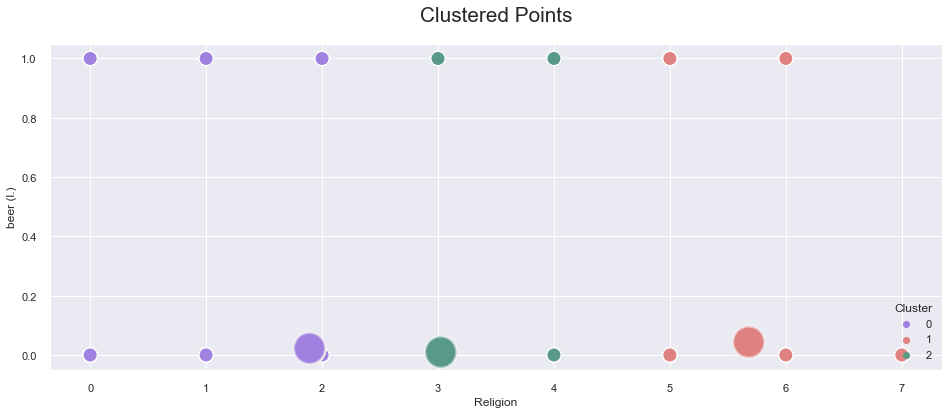

In [634]:

plt.figure(figsize=(16, 6))
colors = ["#A181E0", "#E08181", "#599988"]
ax = sns.scatterplot(data=merge_encode_one, x="Religion", y="beer (l.)", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=merge_encode_one, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

In [637]:
merge_encode_one.groupby(['cluster'])['Religion'].value_counts()

cluster  Religion
0        2           28943
         3            6432
         1            4243
         0             569
         5             297
         6             270
         4             184
         7               2
1        2           31020
         3            4267
         1            1790
         6            1670
         0             303
         4             115
         5              18
         7               1
2        2           16932
         3            2395
         1            1013
         5             635
         0             217
         6              66
         4              23
Name: Religion, dtype: int64

## CLUSTERING WITH DBSCAN

In [93]:
from sklearn.cluster import DBSCAN

In [94]:
dict_model={}
k=0
for eps in range (1,5):
    for min_samples in range (2,5):
        k=k+1
        db = DBSCAN(eps=eps/100, min_samples=min_samples)
        print("db"+str(k))
        print(db)
        db.fit(X)
        key="db"+str(k)
        dict_model[key] = db.labels_
        cl=len(np.unique(db.labels_))
        print("number of clusters: ", cl )
    


dict_model

db1
DBSCAN(eps=0.01, min_samples=2)
number of clusters:  1168
db2
DBSCAN(eps=0.01, min_samples=3)
number of clusters:  755
db3
DBSCAN(eps=0.01, min_samples=4)
number of clusters:  531
db4
DBSCAN(eps=0.02, min_samples=2)
number of clusters:  1168
db5
DBSCAN(eps=0.02, min_samples=3)
number of clusters:  755
db6
DBSCAN(eps=0.02, min_samples=4)
number of clusters:  531
db7
DBSCAN(eps=0.03, min_samples=2)
number of clusters:  1168
db8
DBSCAN(eps=0.03, min_samples=3)
number of clusters:  755
db9
DBSCAN(eps=0.03, min_samples=4)
number of clusters:  531
db10
DBSCAN(eps=0.04, min_samples=2)
number of clusters:  1168
db11
DBSCAN(eps=0.04, min_samples=3)
number of clusters:  755
db12
DBSCAN(eps=0.04, min_samples=4)
number of clusters:  531


{'db1': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db2': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db3': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db4': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db5': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db6': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db7': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db8': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db9': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db10': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db11': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db12': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64)}

In [ ]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)

In [ ]:
for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])

In [ ]:
# fitting to splot

dbs= DBSCAN(eps=0.01, min_samples=2)
dbs.fit(X)
y_dbs = dbs.labels_ #y-pred=kmeans.labels_
#cl=y_dbs.nunique() #nombre de labels

data['dbs_cluster'] = dbs.labels_

fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_dbs, cmap='viridis')

plt.show()

In [ ]:
data['dbs_cluster'] = dbs.labels_
clusters = data['dbs_cluster'].reset_index()
clusters

## clustering the full data with items value (only zero)

In [96]:
X2 = merge_encode_zero[['Religion', 'Social_Group', 'State_code',
        'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'country liquor (l.)',
        'eggs(no)', 'fish, prawn(Kg)', 
       'foreign/ refined liquor or wine (l.)',
       'goat meat /mutton(Kg)',  'pork(Kg)', 'toddy (l.)']]
X2 = X2.sample(frac=.1, axis=0, random_state=0)

In [97]:
X2.head()

,Religion,Social_Group,State_code,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),goat meat /mutton(Kg),pork(Kg),toddy (l.)
18256,2,3,31,0,0,1,1,0,1,0,0,1,0
80725,2,1,33,0,0,0,0,0,0,0,0,0,0
38911,2,1,13,0,0,1,0,1,0,0,0,0,0
36943,2,0,25,0,0,1,0,1,0,0,0,0,0
70495,2,1,20,0,0,1,0,1,1,0,0,0,0


In [98]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X2)
df_pca = pca.transform(X2)
df_pca.shape

(10140, 1)

In [100]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,2)]) #on choisit 12 PCA
df_pca

,PC1
0,-11.788953
1,-13.792729
2,6.214876
3,-5.784096
4,-0.786210
...,...
10135,-14.794326
10136,18.214028
10137,-10.783968
10138,-14.788660


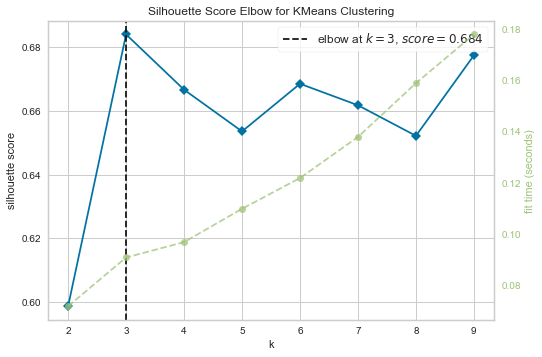

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [101]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

## clustering only colu items in : consumer - non consumer

In [108]:
X3 = merge_encode_one[[ 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)',  'country liquor (l.)',
        'eggs(no)', 'fish, prawn(Kg)', 'food non-veg',
       'foreign/ refined liquor or wine (l.)', 'fruits(fresh)',
       'goat meat /mutton(Kg)',  'pork(Kg)',
         'toddy (l.)', 'vegetables',]]
X3 = X3.sample(frac=.1, axis=0, random_state=0)

In [109]:
X3.head()

,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),eggs(no),"fish, prawn(Kg)",food non-veg,foreign/ refined liquor or wine (l.),fruits(fresh),goat meat /mutton(Kg),pork(Kg),toddy (l.),vegetables
18256,0,1,0,0,1,1,0,1,1,0,0,0,1,0,1
80725,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
38911,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1
36943,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1
70495,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1


PCA

In [110]:
from sklearn.decomposition import PCA

pca = PCA(0.85)
pca.fit(X3)
df_pca = pca.transform(X3)
df_pca.shape

(10140, 8)

In [111]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,9)]) #on choisit 12 PCA
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.439399,1.111544,1.127994,0.044416,0.274876,0.285439,-0.003177,0.848561
1,-0.962669,-0.148989,-0.185965,-0.208714,-0.027465,-0.073305,-0.007988,-0.024524
2,0.577979,-0.583929,0.219718,-0.151030,-0.446919,-0.097541,0.031431,0.016442
3,0.577979,-0.583929,0.219718,-0.151030,-0.446919,-0.097541,0.031431,0.016442
4,0.990686,0.099090,-0.056314,-0.394240,-0.136248,-0.254180,-0.111724,-0.072690
...,...,...,...,...,...,...,...,...
10135,-0.358491,0.368206,0.146465,0.292799,-0.122772,0.894694,0.869757,-0.128874
10136,0.990686,0.099090,-0.056314,-0.394240,-0.136248,-0.254180,-0.111724,-0.072690
10137,0.577979,-0.583929,0.219718,-0.151030,-0.446919,-0.097541,0.031431,0.016442
10138,0.378078,0.980376,1.132400,-0.057730,0.268196,-0.019238,-0.033263,-0.230908


Clustering with kmeans

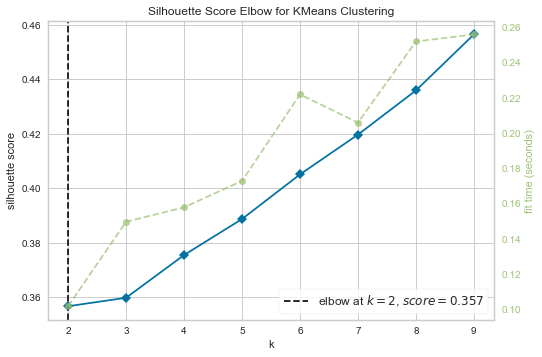

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [112]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

In [ ]:
#This means, only on base on food we can't divide consumer

In [ ]:
model = KMeans(4) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)
y_pred



In [ ]:
np.unique(y_pred, return_counts=True)

In [ ]:
k_centers = model.cluster_centers_

In [ ]:
data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)



In [ ]:

fig, ax = plt.subplots()
sns.scatterplot(data=data_encoder, x='Household usual monthly consumer expenditure(Rs.)', y='electrical and lighting__365days', hue=y_pred, palette=['yellow', 'blue', 'red', 'green'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

In [ ]:
data_encoder.head()

In [ ]:
# LES LABELS DANS LA TABLE NON ENCODEE
data = pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\caste_durable.csv')

In [ ]:
data['cluster'] = model.labels_

In [ ]:
import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.Religion, data.cluster, normalize='columns'))

In [ ]:
data.groupby(['cluster']).mean()

model = KMeans(4) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)
y_pred

np.unique(y_pred, return_counts=True)

k_centers = model.cluster_centers_

data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)


fig, ax = plt.subplots()
sns.scatterplot(data=data_encoder, x='Household usual monthly consumer expenditure(Rs.)', y='electrical and lighting__365days', hue=y_pred, palette=['yellow', 'blue', 'red', 'green'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

data_encoder.head()

# LES LABELS DANS LA TABLE NON ENCODEE
data = pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\caste_durable.csv')

data['cluster'] = model.labels_

import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.Religion, data.cluster, normalize='columns'))

data.groupby(['cluster']).mean()